<a href="https://colab.research.google.com/github/Praveen-51/CNN_/blob/main/CNN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LIBRARIES IMPORTING

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

# Downloading and Unziping Dataset

In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip_ = tf.keras.utils.get_file('/content/drive/MyDrive/Colab_Notebooks/Deep_Learning/CNN/cats_and_dogs.zip', origin=_URL ,extract=True)

In [ ]:
PATH = os.path.join(os.path.dirname(path_to_zip_), 'cats_and_dogs.zip')
PATH 

'/content/drive/MyDrive/Colab_Notebooks/Deep_Learning/CNN/cats_and_dogs.zip'

In [ ]:
New_PATH = '/content/drive/MyDrive/Colab_Notebooks/Deep_Learning/CNN/cats_and_dogs'

!unzip $PATH -d $New_PATH

Archive:  /content/drive/MyDrive/Colab_Notebooks/Deep_Learning/CNN/cats_and_dogs.zip
replace /content/drive/MyDrive/Colab_Notebooks/Deep_Learning/CNN/cats_and_dogs/cats_and_dogs_filtered/vectorize.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: All
  inflating: /content/drive/MyDrive/Colab_Notebooks/Deep_Learning/CNN/cats_and_dogs/cats_and_dogs_filtered/vectorize.py  
  inflating: /content/drive/MyDrive/Colab_Notebooks/Deep_Learning/CNN/cats_and_dogs/cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: /content/drive/MyDrive/Colab_Notebooks/Deep_Learning/CNN/cats_and_dogs/cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: /content/drive/MyDrive/Colab_Notebooks/Deep_Learning/CNN/cats_and_dogs/cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: /content/drive/MyDrive/Colab_Notebooks/Deep_Learning/CNN/cats_and_dogs/cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: /content/drive/MyDrive/Colab_Notebooks/Deep_Learning/CNN/cats_and_dogs

# Setting Directories

In [ ]:
dataPath = '/content/drive/MyDrive/Colab_Notebooks/Deep_Learning/CNN/cats_and_dogs/cats_and_dogs_filtered'
dataPath

'/content/drive/MyDrive/Colab_Notebooks/Deep_Learning/CNN/cats_and_dogs/cats_and_dogs_filtered'

In [ ]:
!ls $dataPath

train  validation  vectorize.py


In [ ]:
train_dir = os.path.join(dataPath, 'train')
validation_dir = os.path.join(dataPath, 'validation')

In [ ]:
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

In [ ]:
num_cat_tr = len(os.listdir(train_cats_dir))
num_dog_tr = len(os.listdir(train_dogs_dir))
num_cat_vl = len(os.listdir(validation_cats_dir))
num_dog_vl = len(os.listdir(validation_dogs_dir))

total_train = num_cat_tr+num_dog_tr
total_validation = num_cat_vl+num_dog_vl


In [ ]:

print('The total training cat images :',num_cat_tr)
print('The total training dog images:',num_dog_tr)
print('=========================================')
print(f'The total validation cat images: {num_cat_vl}')
print(f'The total validation dog images: {num_dog_vl}')
print('=========================================')
print(f'The total training images: {total_train}')
print(f'The total validation images: {total_validation}')

The total training cat images : 1000
The total training dog images: 1000
The total validation cat images: 500
The total validation dog images: 500
The total training images: 2000
The total validation images: 1000


# Training Setup

In [ ]:
batch_size=128    #use power of 2-----> 64,128,256,512
epoch=30
IMG_HEIGHT = 150
IMG_WIDTH = 150


In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255)        #generator for training 
                                                                  #imagedataconverter changes it to black and white
validation_image_generator = ImageDataGenerator(rescale=1./255)   #generator for validation

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                           class_mode='binary')   #Multiclass ----> class_mode = 'categorical'

Found 2000 images belonging to 2 classes.


In [ ]:
validation_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=validation_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                           class_mode='binary')   #Multiclass ----> class_mode = 'categorical'

Found 1000 images belonging to 2 classes.


In [ ]:
sample_training_image, check =next(train_data_gen)  #for visualisation we store in the variable using next

# next actually returns 2 output 1)image to array for RGB to 0-1 2)the class to which each image belong

In [ ]:
len(sample_training_image)   # since the batch size is 128

128

In [ ]:
sample_training_image[0]

array([[[0.54509807, 0.427451  , 0.39607847],
        [0.5411765 , 0.43137258, 0.4156863 ],
        [0.5058824 , 0.43529415, 0.427451  ],
        ...,
        [0.34117648, 0.30588236, 0.2784314 ],
        [0.32156864, 0.28627452, 0.25882354],
        [0.28627452, 0.2509804 , 0.22352943]],

       [[0.7803922 , 0.60784316, 0.50980395],
        [0.7294118 , 0.5803922 , 0.4901961 ],
        [0.6156863 , 0.5137255 , 0.44705886],
        ...,
        [0.35686275, 0.3019608 , 0.25882354],
        [0.3372549 , 0.28235295, 0.2392157 ],
        [0.30980393, 0.25490198, 0.21176472]],

       [[0.8235295 , 0.6392157 , 0.47450984],
        [0.8313726 , 0.6666667 , 0.5176471 ],
        [0.7137255 , 0.6       , 0.48235297],
        ...,
        [0.5411765 , 0.47058827, 0.4156863 ],
        [0.50980395, 0.43921572, 0.38431376],
        [0.43529415, 0.3647059 , 0.30980393]],

       ...,

       [[0.72156864, 0.7019608 , 0.6156863 ],
        [0.70980394, 0.6862745 , 0.62352943],
        [0.6862745 , 0

In [ ]:
check

array([1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [ ]:
def plotimages(image_arr):
  fig, axes = plt.subplots(1,5, figsize=(20,20))
  axes=axes.flatten()
  for img, ax in zip(image_arr,axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

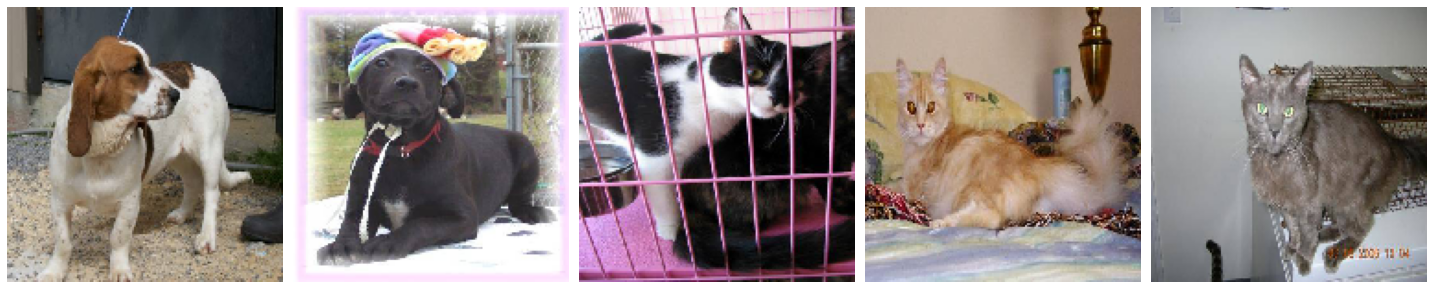

In [ ]:
plotimages(sample_training_image[4:9])

# Model And Compiling

In [ ]:
#using 16 filters of 3X3 (or kernal) Padding = 'same' means same size on output

model = Sequential([
    Conv2D(16,3,padding = 'same', activation='relu',input_shape=(IMG_HEIGHT,IMG_WIDTH,3)),
    MaxPooling2D(),
    Conv2D(32,3,padding = 'same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64,3,padding = 'same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(1)  #categorical or multiclassuse min 3 and activation function softmax
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

# Model Fitting

In [ ]:
history = model.fit(train_data_gen,
                    steps_per_epoch = total_train/batch_size,
                    epochs=30,
                    validation_data = validation_data_gen,
                    validation_steps=total_validation/batch_size)

Epoch 1/30
15/15 [==============================] - 28s 920ms/step - loss: 0.7658 - accuracy: 0.5105 - val_loss: 0.6907 - val_accuracy: 0.5000
Epoch 2/30
15/15 [==============================] - 13s 848ms/step - loss: 0.6787 - accuracy: 0.5180 - val_loss: 0.6457 - val_accuracy: 0.6200
Epoch 3/30
15/15 [==============================] - 13s 857ms/step - loss: 0.6572 - accuracy: 0.6070 - val_loss: 0.6500 - val_accuracy: 0.5450
Epoch 4/30
15/15 [==============================] - 13s 820ms/step - loss: 0.5999 - accuracy: 0.6280 - val_loss: 0.5938 - val_accuracy: 0.6880
Epoch 5/30
15/15 [==============================] - 13s 821ms/step - loss: 0.5400 - accuracy: 0.7070 - val_loss: 0.5771 - val_accuracy: 0.7010
Epoch 6/30
15/15 [==============================] - 13s 829ms/step - loss: 0.4793 - accuracy: 0.7540 - val_loss: 0.7754 - val_accuracy: 0.6540
Epoch 7/30
15/15 [==============================] - 13s 835ms/step - loss: 0.4783 - accuracy: 0.7370 - val_loss: 0.5670 - val_accuracy: 0.7210

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

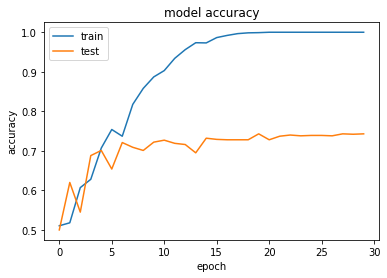

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

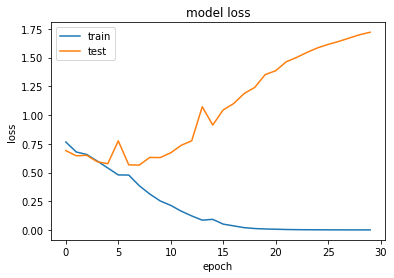

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Data Augmentation

In [ ]:
# 1. Horizontal Flip

train_images_horizontal = ImageDataGenerator(rescale=1./255,horizontal_flip=True)
train_images_horizontal_gen= train_images_horizontal.flow_from_directory( batch_size=batch_size,
                                          directory = train_dir,
                                          shuffle = True,
                                          target_size=(IMG_HEIGHT,IMG_WIDTH),
                                          class_mode='binary') # Multiclass ---> class_mode ="categorical"

Found 2000 images belonging to 2 classes.


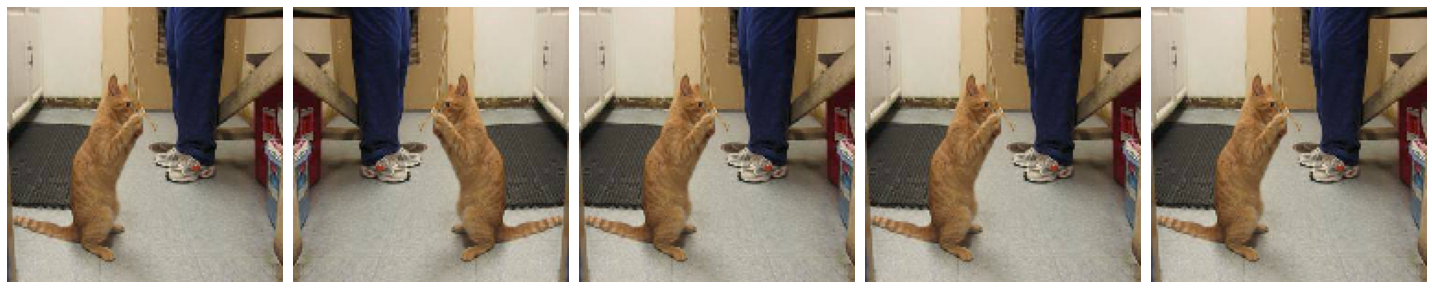

In [ ]:
augmented_images = [train_images_horizontal_gen[0][0][0] for i in range(5)]
plotimages(augmented_images)

Found 2000 images belonging to 2 classes.


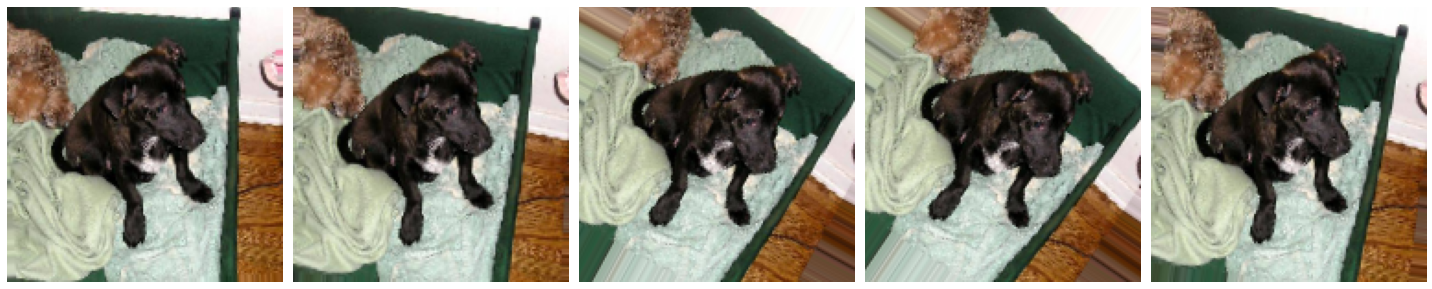

In [ ]:

train_images_rotation = ImageDataGenerator(rescale=1./255,rotation_range=45)
train_images_rotationl_gen= train_images_rotation.flow_from_directory( batch_size=batch_size,
                                          directory = train_dir,
                                          shuffle = True,
                                          target_size=(IMG_HEIGHT,IMG_WIDTH),
                                          class_mode='binary') # Multiclass ---> class_mode ="categorical"

augmented_images = [train_images_rotationl_gen[0][0][0] for i in range(10)]
plotimages(augmented_images)

Found 2000 images belonging to 2 classes.


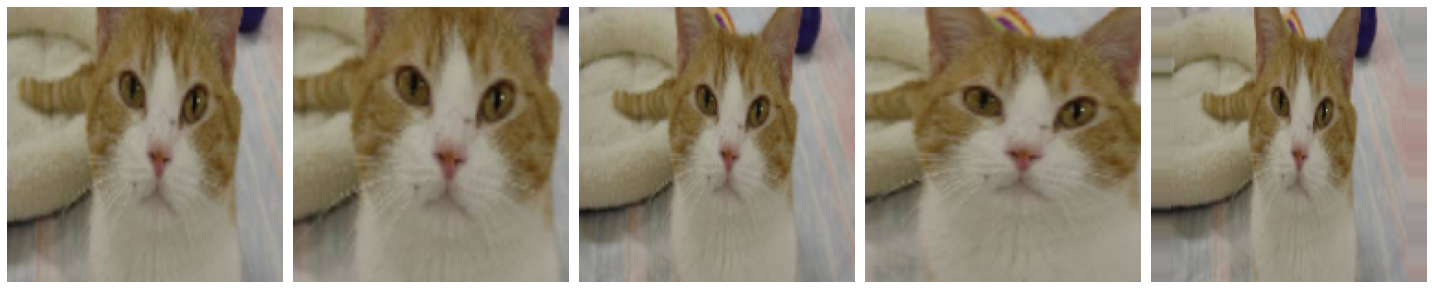

In [ ]:
# 2. zoom the image

train_images_zoom = ImageDataGenerator(rescale=1./255,zoom_range=0.5)
train_images_zoom_gen= train_images_zoom.flow_from_directory( batch_size=batch_size,
                                          directory = train_dir,
                                          shuffle = True,
                                          target_size=(IMG_HEIGHT,IMG_WIDTH),
                                          class_mode='binary') # Multiclass ---> class_mode ="categorical"

augmented_images = [train_images_zoom_gen[0][0][0] for i in range(10)]
plotimages(augmented_images)

In [ ]:

train_image_generator = ImageDataGenerator(rescale=1./255,
                                           rotation_range=45,
                                           horizontal_flip=True,
                                           zoom_range=0.5,
                                           width_shift_range=.15,
                                           height_shift_range=0.15) # generator for our training data

In [ ]:
train_data_gen= train_image_generator.flow_from_directory( batch_size=batch_size,
                                          directory = train_dir,
                                          shuffle = True,
                                          target_size=(IMG_HEIGHT,IMG_WIDTH),
                                          class_mode='binary') # Multiclass ---> class_mode ="categorical"

Found 2000 images belonging to 2 classes.


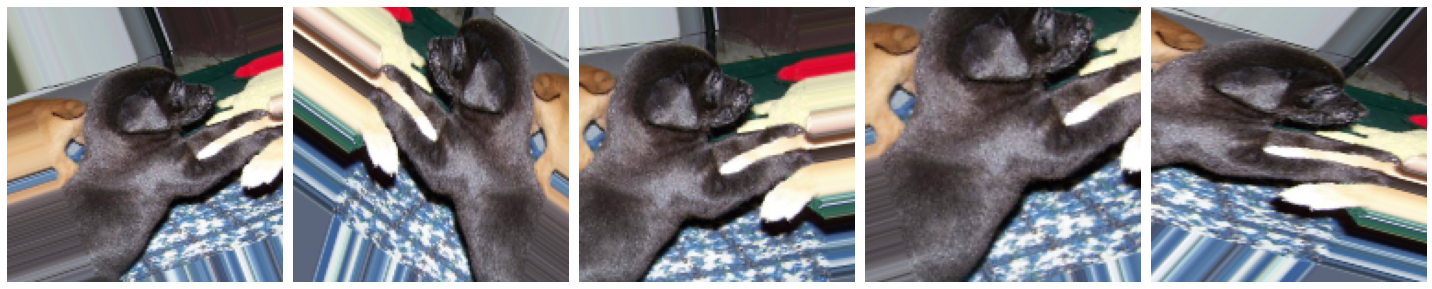

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(10)]
plotimages(augmented_images)

# Dropout

In [ ]:
# Dropout

model_new = Sequential([
        Conv2D(16,3,padding='same',activation='relu',input_shape=(IMG_HEIGHT,IMG_WIDTH,3)),
        MaxPooling2D(),
        Dropout(0.2),
        Conv2D(32,3,padding='same',activation='relu'),
        MaxPooling2D(),
        Conv2D(64,3,padding='same',activation='relu'),
        MaxPooling2D(),
        Dropout(0.2),
        Flatten(),
        Dense(512,activation='relu'),
        Dense(1)
])

In [ ]:
model_new.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [ ]:
model_new.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 75, 75, 16)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 37, 37, 64)       

In [ ]:
history = model_new.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=100,
    validation_data=validation_data_gen,
    validation_steps=total_validation // batch_size)

Epoch 1/100
15/15 [==============================] - 23s 1s/step - loss: 1.2382 - accuracy: 0.5043 - val_loss: 0.6930 - val_accuracy: 0.4978
Epoch 2/100
15/15 [==============================] - 21s 1s/step - loss: 0.6888 - accuracy: 0.5123 - val_loss: 0.6897 - val_accuracy: 0.5112
Epoch 3/100
15/15 [==============================] - 21s 1s/step - loss: 0.6823 - accuracy: 0.5363 - val_loss: 0.6817 - val_accuracy: 0.5100
Epoch 4/100
15/15 [==============================] - 22s 1s/step - loss: 0.6815 - accuracy: 0.5198 - val_loss: 0.6660 - val_accuracy: 0.5346
Epoch 5/100
15/15 [==============================] - 20s 1s/step - loss: 0.6621 - accuracy: 0.5598 - val_loss: 0.6558 - val_accuracy: 0.5525
Epoch 6/100
15/15 [==============================] - 20s 1s/step - loss: 0.6575 - accuracy: 0.5636 - val_loss: 0.6406 - val_accuracy: 0.5804
Epoch 7/100
15/15 [==============================] - 20s 1s/step - loss: 0.6352 - accuracy: 0.5812 - val_loss: 0.6371 - val_accuracy: 0.5904
Epoch 8/100
1

In [ ]:
import math

def sigmoid(x):
  return 1/ (1+ math.exp(-x))
# Predict with new data
img_size=(150,150)

from PIL import Image
import numpy as np

im = Image.open("/content/drive/MyDrive/Colab_Notebooks/Deep_Learning/CNN/Cat_and_Dog_Test/VIER PFOTEN_2016-07-08_011-4993x3455-1920x1329.jpg")
im = im.resize(img_size)
im = np.expand_dims(im,axis=0)
im = np.array(im)
im = im/255
pred = model.predict([im])
pred =sigmoid(pred[0][0])
if pred >=0.5:
  prediction='dog'
  print("Dog")
else:
  prediction='cat'
  print("cat")

cat


# Saving Model

In [ ]:
# Saving the model

model.save("/content/drive/MyDrive/Colab_Notebooks/Deep_Learning/CNN_clf.h5")


In [ ]:
from keras.models import load_model

model_h5 = load_model("/content/drive/MyDrive/Colab_Notebooks/Deep_Learning/CNN/CNN_clf.h5")

In [ ]:
import math

def sigmoid(x):
  return 1/ (1+ math.exp(-x))
# Predict with new data
img_size=(150,150)

from PIL import Image
import numpy as np

im = Image.open("/content/drive/MyDrive/Colab_Notebooks/Deep_Learning/CNN/Cat_and_Dog_Test/cute-dog-headshot.jpg")
im = im.resize(img_size)
im = np.expand_dims(im,axis=0)
im = np.array(im)
im = im/255
pred = model_h5.predict([im])
pred =sigmoid(pred[0][0])
if pred >=0.5:
  prediction='dog'
  print("Dog")
else:
  prediction='cat'
  print("cat")


Dog
